In [1]:
import matplotlib.pyplot as plt
import cv2

from lexoid.core.conversion_utils import convert_doc_to_base64_images, base64_to_cv2_image
from lexoid.core.parse_type.static_parser import parse_with_pdfplumber
from lexoid.core.utils import find_bboxes_for_substring

/home/dilith/Projects/oidlabs/pdf-parser/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdf_path = "inputs/test_1.pdf"
result = parse_with_pdfplumber(pdf_path, start=0, title="Demo PDF")

In [12]:
page_images = convert_doc_to_base64_images(pdf_path)
_, b64_img = page_images[0]
cv2_img = base64_to_cv2_image(b64_img)
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

def visualize_bounding_boxes(matched_bboxes):
    plt.figure(figsize=(10, 12))
    plt.imshow(rgb_img)
    ax = plt.gca()
    H_img, W_img = rgb_img.shape[:2]

    # Draw bounding boxes
    for bbox in matched_bboxes:
        x0, top, x1, bottom = bbox
        x0 *= W_img
        x1 *= W_img
        top *= H_img
        bottom *= H_img
        rect = plt.Rectangle(
            (x0, top),
            x1 - x0,
            bottom - top,
            linewidth=2,
            edgecolor="red",
            facecolor="none"
        )
        ax.add_patch(rect)

    plt.axis("off")
    plt.show()


In [3]:
seg_idx = 0
segment = result["segments"][seg_idx]
content = segment["content"]
bboxes = segment["bboxes"]

Found 5 bounding boxes: [(0.22055254901960786, 0.14481848484848484, 0.3109664705882354, 0.1649699999999999), (0.31699058823529425, 0.14481848484848484, 0.3386617647058824, 0.1649699999999999), (0.34460764705882363, 0.14481848484848484, 0.35709921568627456, 0.1649699999999999), (0.36304509803921575, 0.14481848484848484, 0.4106121568627451, 0.1649699999999999), (0.4165580392156863, 0.14481848484848484, 0.47721647058823524, 0.1649699999999999)]


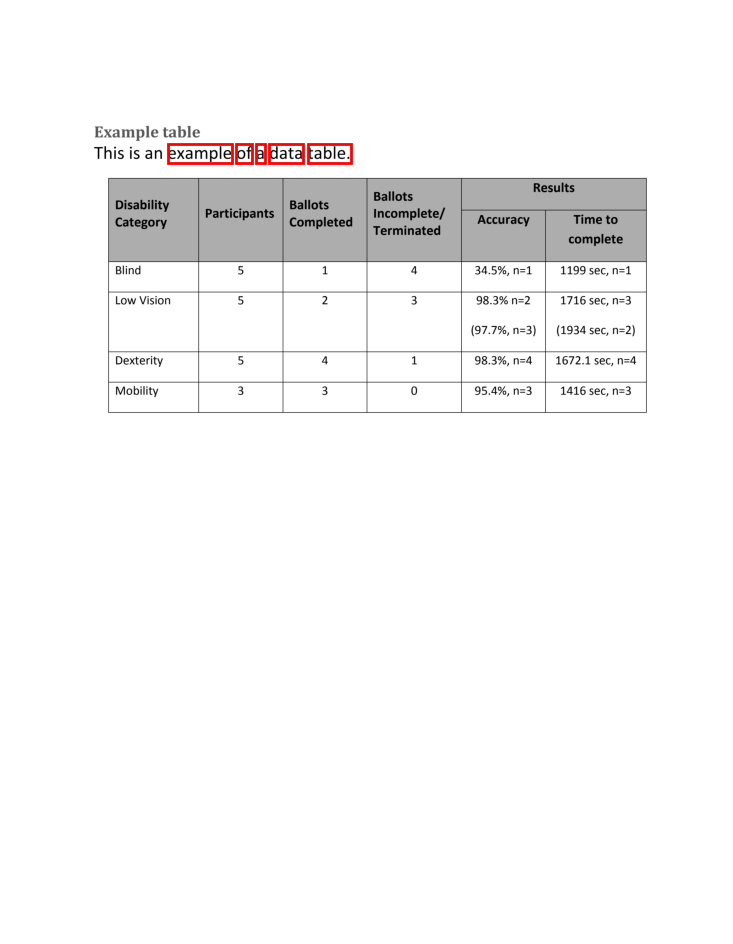

In [22]:
substring = "example of a data table."
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, fuzzy=True)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(matched_bboxes)

Found 3 bounding boxes: [(0.7894117647058824, 0.21915151515151512, 0.8298627450980393, 0.2343030303030303), (0.8343137254901961, 0.21915151515151512, 0.8517254901960783, 0.2343030303030303), (0.7821568627450981, 0.24036363636363628, 0.8588823529411764, 0.2555151515151514)]


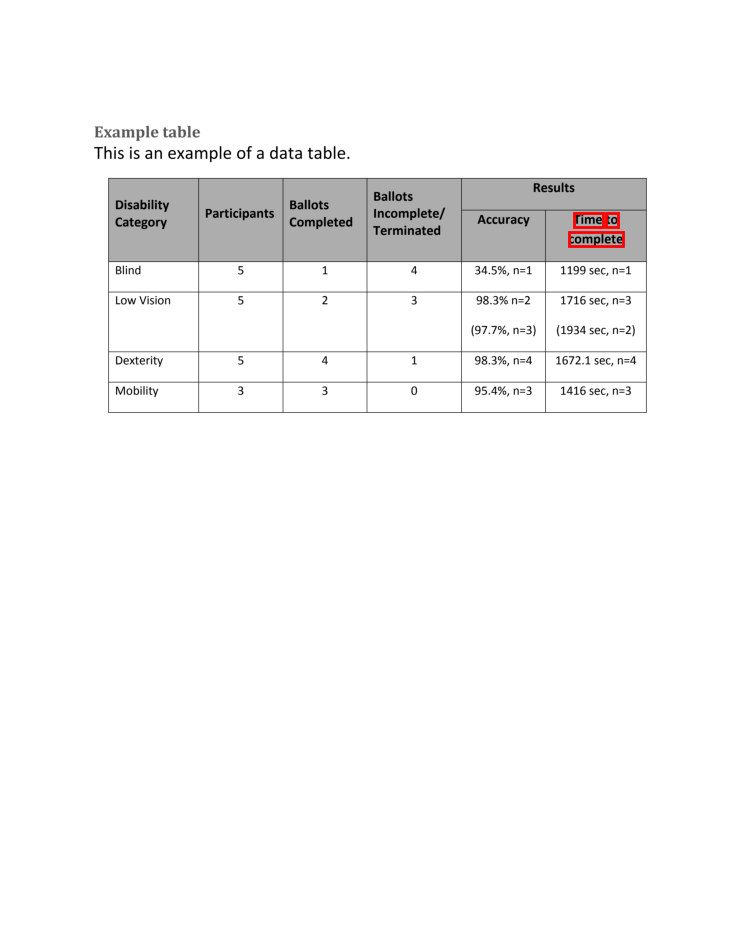

In [ ]:
substring = "Time 2 complete" # Instead of "Time to complete"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, fuzzy=True)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(matched_bboxes)

Found 2 bounding boxes: [(0.7043082352941176, 0.372249696969697, 0.7316917647058824, 0.3861890909090909), (0.8501913725490194, 0.372249696969697, 0.8775749019607842, 0.3861890909090909)]


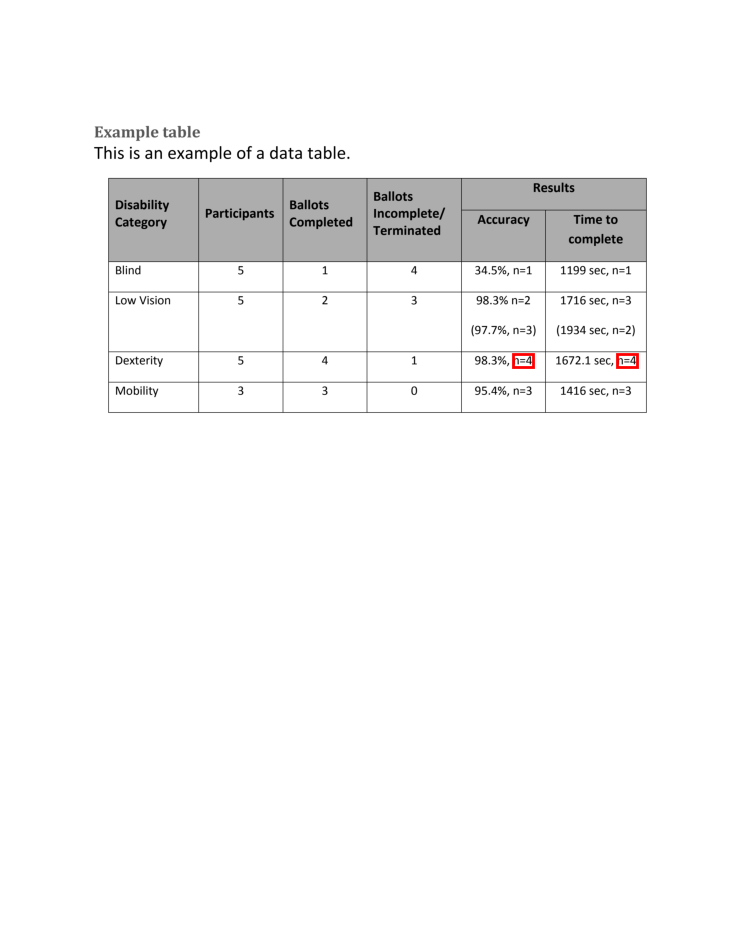

In [19]:
substring = "n=4"
matched_bboxes = find_bboxes_for_substring(bboxes, content, substring, all_matches=True)
print(f"Found {len(matched_bboxes)} bounding boxes:", matched_bboxes)

visualize_bounding_boxes(matched_bboxes)